<a href="https://colab.research.google.com/github/K-Kilel/Moringa-School-Core-Week-2-Independent-Project/blob/main/Kelvin_Kilel_Moringa_School_Core_Week_2_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Financial Inclusion in Kenya, Uganda, Rwanda and Tanzania.**

**Research Question**

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.


**Metrics for Success**

Determine insights on the demographic factors that drive individuals' financial outcomes.

Design model that will be used to predict which individuals are most likely to have or use a bank account.


**Understanding the context**

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.


**Recording the Experimental Design**

1. Find and deal with outliers, anomalies, and missing data within the dataset.

2. Perform univariate, bivariate and multivariate analysis recording your observations.

3. Implement the solution by performing the respective analysis i.e. factor analysis, principal component analysis, and discriminant analysis.

4. Challenge your solution by providing insights on how you can make improvements.


**Data Relevance**

The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018.

##### Importing the Libraries

In [449]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##### Reading the Dataset

In [450]:
fin_df = pd.read_csv('http://bit.ly/FinancialDataset')

fin_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


##### Checking our data

In [451]:
# Checking the number of record in our dataset

print('The dataset has', fin_df.shape[0], 'rows and', fin_df.shape[1], 'columns.')

The dataset has 23524 rows and 13 columns.


In [452]:
# Previewing the top of our dataset

fin_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [453]:
# Previewing the bottom of our dataset

fin_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [454]:
# Checking whether each column has an appropriate datatype

fin_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [455]:
# Dropping columns not relevant for analysis 
fin_df.drop(columns = ['uniqueid', 'The relathip with head'], inplace = True )

In [456]:
# Converting all column names to lower for efficiency

fin_df.columns= fin_df.columns.str.lower()
fin_df.head()


,country,year,has a bank account,type of location,cell phone access,household_size,respondent age,gender_of_respondent,marital_status,level of educuation,type of job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Single/Never Married,Primary education,Informally employed


##### External Data Source Validation

##### Cleaning the Dataset

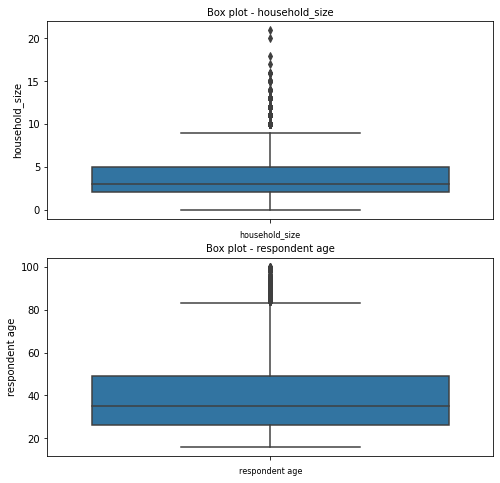

In [457]:
# Checking for outliers


#print(sns.boxplot(fin_df['household_size']))
#print(sns.boxplot(fin_df['Respondent Age']))


col_names = ['household_size', 'respondent age']
fig, ax = plt.subplots(len(col_names), figsize=(8,8))

for i, col_val in enumerate(col_names):

    sns.boxplot(y= fin_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

###### There are outliers on both household size and the respondents' age. The outliers should not be dropped because they are valuable values for a conclusive outcome. 

In [458]:
# Identifying missing data
fin_df.isnull().sum()

country                 14
year                     0
has a bank account      36
type of location        15
cell phone access       11
household_size          28
respondent age          34
gender_of_respondent    34
marital_status          32
level of educuation     29
type of job             30
dtype: int64

In [459]:
# Dropping the missing values 
# Explanation: To avoid inconsistency in our analysis

fin_df.dropna(inplace = True)

In [460]:
# Checking for missing values 
# Explanation: to confirm the missing values have been dropped

fin_df.isnull().sum()

country                 0
year                    0
has a bank account      0
type of location        0
cell phone access       0
household_size          0
respondent age          0
gender_of_respondent    0
marital_status          0
level of educuation     0
type of job             0
dtype: int64

In [461]:
# Checking for anomalies in each column
# Explanation: to improve on accuracy.

for i in fin_df.columns:
  print(fin_df[i].unique())
 


['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
[2018 2029 2056 2016 2039 2017]
['Yes' 'No']
['Rural' 'Urban']
['Yes' 'No']
[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21.  0.
 18. 17. 20.]
[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  93.  74.  88.  90.
  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.  99.
 100.]
['Female' 'Male']
['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']
['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA' '6']
['Self employed' 'Government Dependent' 'Formally employed Private'
 'Informally employed' 'Formally em

In [462]:
# There are anomalies in the year column values. The values 2029,2056 and 2039 are not part of the specied year of analysis. 
# The anomalies will be removed from the dataset for accuracy of analysis.


fin_df = fin_df[~(fin_df["year"].isin([2029,2056,2039]))]

fin_df['year'].unique()

array([2018, 2016, 2017])

### Univariate Analysis

a) Central Tendecies

In [463]:
# Plotting Univariate Analysis and recording observation
# Finding the mean age

fin_df['respondent age'].mean()

38.80706940874036

###### The average age of the respondents is 38 - 39 years.

In [464]:
# Finding the mean Household size

fin_df['household_size'].mean()

3.688560411311054

###### The average household size for the repondents is 3 people.

b) Dispersion

In [465]:
# Finding Range of household size

max_size = fin_df['household_size'].max()
min_size = fin_df['household_size'].min()

range = max_size - min_size
range

21.0

###### The range of household size is 21

In [466]:
# Finding range of age

max_age = fin_df['respondent age'].max()
min_age = fin_df['respondent age'].min()

Age_range = max_age - min_age
Age_range

84.0

##### The range for age is 84.

In [467]:
# Description of the dataset

fin_df.describe()

,year,household_size,respondent age
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


### Skewness

In [468]:
fin_df['household_size'].skew()

0.9741827150450616

In [469]:
fin_df['respondent age'].skew()

0.8406145812311228

Both household size and respondents age are positively skewed because their skew is greater than 0.5 but less than 1. 

### Kurtosis

In [470]:
fin_df['household_size'].kurt()

1.1538357462528523

In [471]:
fin_df['respondent age'].kurt()

0.09826807013177241

##### Both Household size and Respondents' age hve shorter distribution, thinner tails than the normal distribution. Their peak are lower and broader than Mesokurtic, which means that data are light-tailed.

##### The reason for this is because the extreme values(outliers) are less than that of the normal distribution.

### Undersanding the responses from the Respondents in the dataset 

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

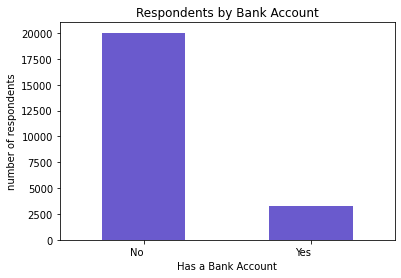

In [472]:
fin_df['has a bank account'].value_counts().plot.bar(color = 'slateblue')

plt.xlabel('Has a Bank Account')
plt.ylabel('number of respondents')
plt.title('Respondents by Bank Account')

plt.xticks(rotation=360, ha='right')

##### A significantly large population of the respondents did not have bank accounts.

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

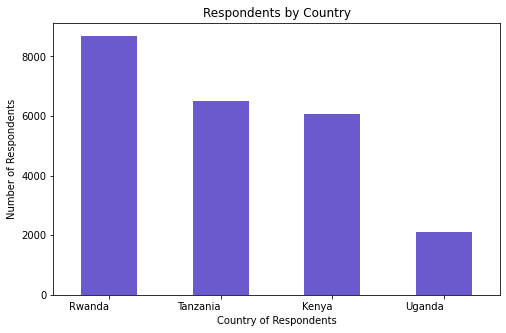

In [473]:
# Geographical location of the respondents 

fin_df['country'].value_counts().plot.bar(color = 'slateblue', figsize=(8,5))
plt.xlabel('Country of Respondents')
plt.ylabel('Number of Respondents')
plt.title('Respondents by Country')

plt.xticks(rotation=360, ha='right')


###### From our dataset, more respondents were from Rwanda, then Tanzania, followed by Kenya with the least number from Uganda.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

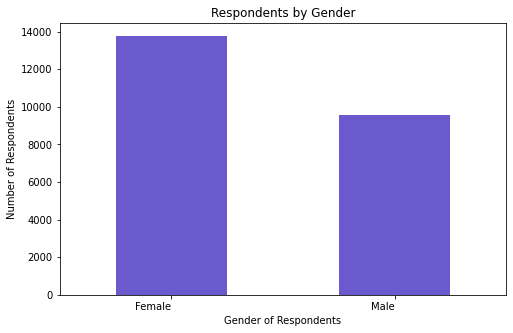

In [474]:
# Gender distribution of respondents

fin_df['gender_of_respondent'].value_counts().plot.bar(color = 'slateblue', figsize=(8,5))
plt.xlabel('Gender of Respondents')
plt.ylabel('Number of Respondents')
plt.title('Respondents by Gender')

plt.xticks(rotation=360, ha='right')

###### More respondents on our datasets were females as compared to male.

### Bivariate Analysis

i.) Numerical and Numerical

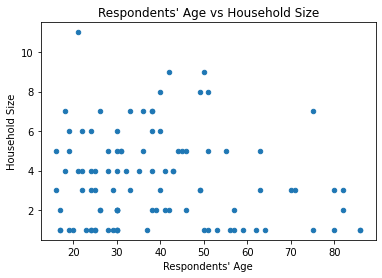

In [475]:
# Plotting our scatterplot
#plt.scatter(fin_df['Respondent Age'], fin_df['household_size'])
fin_df[fin_df['respondent age'] > 10].sample(100).plot.scatter(x='respondent age', y='household_size')

# Giving our scatterplot a title
plt.title("Respondents' Age vs Household Size")

# Labelling our x axis
plt.xlabel("Respondents' Age")

# Labelling our y axis
plt.ylabel("Household Size")

# Displaying our scatterplot
plt.show()

###### This plot shows us that household size and age of the respondents are weakly correlated: that is, that large household sizes does not reflect advanced age of respondents.

###### In order to make effective use of this plot, we had to downsample our data, taking just 100 points from the full set. This is because naive scatter plots do not effectively treat points which map to the same place.

In [476]:
# Finding the Correlation to understand more on the relationship of household size variable and age of respondents

Correlation = fin_df['household_size'].corr(fin_df['respondent age'])
Correlation


-0.1196711523415487

##### There is a weak correlation between the two variables

ii.) Categorical and Categorical

gender_of_respondent  has a bank account
Female                No                    12286
                      Yes                    1480
Male                  No                     7758
                      Yes                    1816
Name: has a bank account, dtype: int64


Text(0.5, 1.0, 'Gender vs Has a Bank Account')

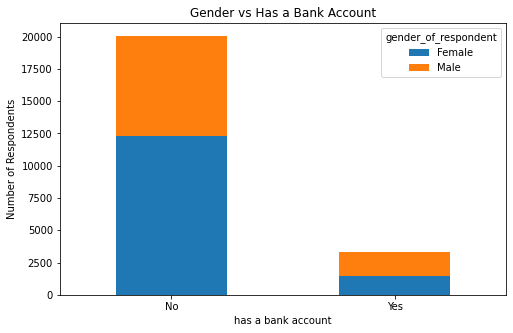

In [477]:
# Plotting Stacked bar chat to show relationship of categorical variables
# Plotting a stacked barchat on Gender of respondents versus those that have a bank account and those that do not have.

#Grouping the desired variables 
gender_df = fin_df.groupby(['gender_of_respondent'])['has a bank account'].value_counts()
print(gender_df)

# Plotting the chart
pd.crosstab(fin_df['has a bank account'], fin_df['gender_of_respondent']).plot(kind='bar', stacked=True, figsize=(8,5), rot = 0)

# Labeling the y-axis
plt.ylabel('Number of Respondents')

# Giving a title to the stacked bar chart
plt.title('Gender vs Has a Bank Account')


###### There are more respondents that do not have a bank account as compared to those that have a bank account. 

###### More female respondents do not have bank accounts as compared to the male respondents. 

###### Slightly, More male respondents have bank accounts as compared to the female respondents.

type of location  has a bank account
Rural             No                    12600
                  Yes                    1663
Urban             No                     7444
                  Yes                    1633
Name: has a bank account, dtype: int64


Text(0.5, 1.0, 'Type of Location vs Has a Bank Account')

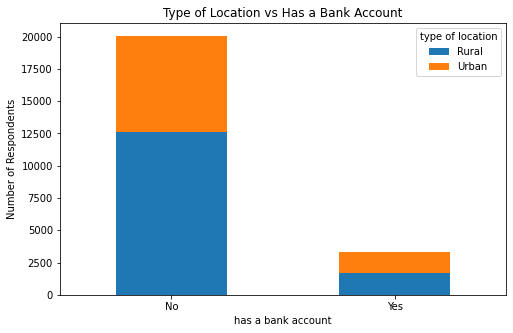

In [478]:
# Plotting Location type to understand how it affects individuals from having a bank account

#Grouping the desired variables 
loc_df = fin_df.groupby(['type of location'])['has a bank account'].value_counts()
print(loc_df)

# Plotting the stacked bar chart

pd.crosstab(fin_df['has a bank account'], fin_df['type of location']).plot(kind='bar', stacked=True, figsize=(8,5), rot= 0)

# Labeling the y-axis
plt.ylabel('Number of Respondents')

# Giving a title to the chart
plt.title('Type of Location vs Has a Bank Account')


###### There are many respondents who live in the rural location type compared to the respondents that live in the urban location type.

###### Significant number of respondents in rural location type do not have bank accounts as compared to those in the urban location type.

###### There is an equal number of those that have bank accounts in both location types.

### Chi-square 

###### Performing chi-square test to test if there is a correlation between location type and having a bank account. 

###### H₀: whether location type and having a bank account are independent, i.e. no relationship

###### H₁: whether location type and having a bank account are dependent, i.e. there is a relationship

α = 0.05

In [479]:
import scipy.stats as stats
# create contingency table
data_crosstab = pd.crosstab(fin_df['has a bank account'],
                            fin_df['type of location'],
                           margins=True, margins_name="Total")

# significance level
alpha = 0.05

# Calcualtion of Chisquare test statistics
chi_square = 0
rows = fin_df['has a bank account'].unique()
columns = fin_df['type of location'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.norm.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)
    
# The critical value approach
print("\n--------------------------------------------------------------------------------------")
print("Approach 2: The critical value approach to hypothesis testing in the decision rule")
critical_value = stats.chi2.ppf(1-alpha, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if chi_square > critical_value:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", critical_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 183.32651955925468  and p value is: 0.0
Null Hypothesis is rejected.

--------------------------------------------------------------------------------------
Approach 2: The critical value approach to hypothesis testing in the decision rule
chisquare-score is: 183.32651955925468  and p value is: 3.841458820694124
Null Hypothesis is rejected.


Conclusion 

We have enough evidence that there is an association between location type and having a bank account, at 5% significance level.

### Multivariate Analysis

In [480]:
# Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels.

X = fin_df.drop('has a bank account', 1)
y = fin_df.iloc[:, 2]

In [481]:
# Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [482]:
from sklearn.preprocessing import LabelEncoder

# Convert X_train labels to numerical Data
le = LabelEncoder()

X_train['country'] = le.fit_transform(X_train['country'])
X_train.head()

X_train['type of location'] = le.fit_transform(X_train['type of location'])
X_train.head()

X_train['cell phone access'] = le.fit_transform(X_train['cell phone access'])
X_train.head()

X_train['gender_of_respondent'] = le.fit_transform(X_train['gender_of_respondent'])
X_train.head()

X_train['marital_status'] = le.fit_transform(X_train['marital_status'])
X_train.head()

X_train['level of educuation'] = le.fit_transform(X_train['level of educuation'])
X_train.head()

X_train['type of job'] = le.fit_transform(X_train['type of job'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [483]:
# Convert X_test labels to numerical Data

X_test['country'] = le.fit_transform(X_test['country'])

X_test['type of location'] = le.fit_transform(X_test['type of location'])

X_test['cell phone access'] = le.fit_transform(X_test['cell phone access'])

X_test['gender_of_respondent'] = le.fit_transform(X_test['gender_of_respondent'])

X_test['marital_status'] = le.fit_transform(X_test['marital_status'])


X_test['level of educuation'] = le.fit_transform(X_test['level of educuation'])


X_test['type of job'] = le.fit_transform(X_test['type of job'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [484]:
# Normalization
# PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [485]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [486]:
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 

explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.19331956, 0.16724818, 0.11556522, 0.10468319, 0.09648796,
       0.08210572, 0.07463785, 0.06598812, 0.05470002, 0.0452642 ])

###### It can be seen that first principal component is responsible for 19.33% variance. Similarly, the second principal component causes 16.72% variance in the dataset. 


In [491]:
# Using 1 Principal Component

from sklearn.decomposition import PCA

pca = PCA(n_components= 1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [361]:
# Training and Making Predictions
# In this case we'll use random forest classification for making the predictions.
# 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [362]:
# Step 10: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438


###### Noting from the output that with only one feature, the random forest algorithm is able to correctly predict 4036 out of 4668 instances, resulting in 86.46% accuracy.

**Conclusion**

The model above can be used to predict which individuals are most likely to have or use a bank account in Kenya, Rwanda, Tanzania, and Uganda. 

The analysis also provided insights into some of the key demographic factors that might drive individuals’ financial outcomes. 
 